In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
inputDir = "/home/onimem/work/Open_world/NBA/EDA"
outputDir = "/home/onimem/work/Open_world/NBA/Graph"

from subprocess import check_output
print(check_output(["ls", inputDir]).decode("utf8"))

EDA.csv
Players.csv
Seasons_Stats.csv
player_data.csv



In [2]:
# EDA.csv
players=pd.read_csv(inputDir + '/EDA.csv')
players.drop('Unnamed: 0', axis=1, inplace=True)
print(players.shape)
players.head()

(20279, 17)


,Year,Player,Pos,Tm,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS,height,weight,Age
0,1950.0,Curly Armstrong,G-F,DET,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0,180.0,77.0,31.0
1,1951.0,Curly Armstrong,G-F,DET,38.0,72.0,232.0,72.0,232.0,58.0,90.0,77.0,97.0,202.0,180.0,77.0,32.0
2,1950.0,Cliff Barker,SG,INO,49.0,102.0,274.0,102.0,274.0,75.0,106.0,109.0,99.0,279.0,188.0,83.0,28.0
3,1951.0,Cliff Barker,SG,INO,56.0,51.0,202.0,51.0,202.0,50.0,77.0,115.0,98.0,152.0,188.0,83.0,29.0
4,1952.0,Cliff Barker,SG,INO,44.0,48.0,161.0,48.0,161.0,30.0,51.0,70.0,56.0,126.0,188.0,83.0,30.0


In [3]:
seasons = players.sort_values(by='Year').copy()
print(seasons.shape)
seasons.head()

(20279, 17)


,Year,Player,Pos,Tm,G,FG,FGA,2P,2PA,FT,FTA,AST,PF,PTS,height,weight,Age
0,1950.0,Curly Armstrong,G-F,DET,63.0,144.0,516.0,144.0,516.0,170.0,241.0,176.0,217.0,458.0,180.0,77.0,31.0
161,1950.0,Chuck Gilmur,F-C,WSC,68.0,127.0,379.0,127.0,379.0,164.0,241.0,108.0,275.0,418.0,193.0,102.0,27.0
304,1950.0,Slater Martin,PG,LAL,67.0,106.0,302.0,106.0,302.0,59.0,93.0,148.0,162.0,271.0,178.0,77.0,24.0
163,1950.0,Normie Glick,F,LAL,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,201.0,86.0,22.0
164,1950.0,Paul Gordon,F,BLB,4.0,0.0,6.0,0.0,6.0,3.0,5.0,3.0,3.0,3.0,190.0,83.0,22.0


In [4]:
years = [i for i in range(1950, 2018)]
num_player = seasons.groupby('Year').count()['Player']
history = {"year":years, "player":num_player}

In [5]:
def plot_history(history):

    plt.plot(history['year'], history['player'], marker=".")
    plt.xlabel('year')
    plt.ylabel('player')
    plt.show()

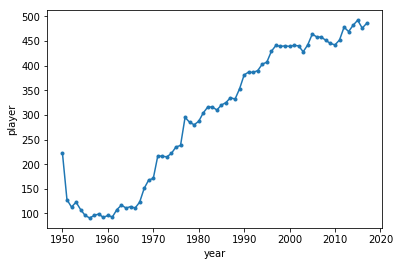

In [6]:
plot_history(history)

In [7]:
seasons_year = {}
for year in years:
    seasons_year[year] = seasons.query('Year == ' + str(year))

In [8]:
attribute = list(set(list(seasons_year[1950])) - set(['Year', 'Player']))

#import networkx as nx
#graph = {}
#for year in range(1951, 1956):
#    graph[year] = nx.Graph() 
#    for name in seasons_year[year]['Player']:
#        #print(name)
#        for att in attribute:
            #print(list(seasons_year[year].query('Player == "' + name + '"')[att]))
#            graph[year].add_node(name, **{att : list(seasons_year[year].query('Player == "' + name + '"')[att])[0]})

#    sameteam = []
#    for name1 in seasons_year[year]['Player']:
#        tm1 = list(seasons_year[year].query('Player == "' + name1 + '"')['Tm'])[0]
#        for name2 in seasons_year[year]['Player']:
#            if name1 == name2:
#                break
#            tm2 = list(seasons_year[year].query('Player == "' + name2 + '"')['Tm'])[0]
#            if tm1 == tm2:
#                sameteam.append((name1, name2))
#    graph[year].add_edges_from(sameteam)
#    print(year)
#    print(graph[year].nodes(data=True))
#    print(graph[year].edges())
#for year in range(1951, 1956):
#    nx.draw_networkx(graph[year])
#    plt.show()

graph = {}
for year in years:
    graph[year] = {}
    graph[year]['nodes'] = {}
    graph[year]['edges'] = {}
    for name in seasons_year[year]['Player']:
        graph[year]['nodes'][name] = {}
        for att in attribute:
            graph[year]['nodes'][name][att] = list(seasons_year[year].query('Player == "' + name + '"')[att])[0]
    
    graph[year]['edges']['team'] = []
    sameteam = []
    for name1 in seasons_year[year]['Player']:
        tm1 = list(seasons_year[year].query('Player == "' + name1 + '"')['Tm'])[0]
        for name2 in seasons_year[year]['Player']:
            if name1 == name2:
                continue
            tm2 = list(seasons_year[year].query('Player == "' + name2 + '"')['Tm'])[0]
            if tm1 == tm2 and (name1, name2) not in sameteam:
                sameteam.append((name1, name2))
    graph[year]['edges']['team'].extend(sameteam)

with open(outputDir + '/nba.graph', 'wb') as f:
    pickle.dump(graph, f)

In [9]:
len(graph[year]['edges'])

1

In [10]:
graph[year]['edges'][710]

KeyError: 710

In [11]:
with open(outputDir + '/nba.graph', mode='rb') as fi:
    data = pickle.load(fi)

In [12]:
data[year]['edges'][710]

KeyError: 710

In [13]:
print(len(data), len(data[1952]), len(data[1952]['nodes']), len(data[1952]['edges']), len(data[1952]['edges']['team']))

68 2 113 1 1218


In [14]:
data[1952]

{'nodes': {'Bill Sharman': {'PF': 181.0,
   'FT': 183.0,
   'AST': 151.0,
   '2P': 244.0,
   '2PA': 628.0,
   'Pos': 'SG',
   'FGA': 628.0,
   'G': 63.0,
   'FG': 244.0,
   'weight': 79.0,
   'Age': 25.0,
   'Tm': 'BOS',
   'height': 185.0,
   'PTS': 671.0,
   'FTA': 213.0},
  'Don Savage': {'PF': 22.0,
   'FT': 18.0,
   'AST': 12.0,
   '2P': 9.0,
   '2PA': 43.0,
   'Pos': 'F-G',
   'FGA': 43.0,
   'G': 12.0,
   'FG': 9.0,
   'weight': 92.0,
   'Age': 23.0,
   'Tm': 'PHI',
   'height': 190.0,
   'PTS': 36.0,
   'FTA': 28.0},
  'John Rennicke': {'PF': 7.0,
   'FT': 3.0,
   'AST': 1.0,
   '2P': 4.0,
   '2PA': 18.0,
   'Pos': 'G',
   'FGA': 18.0,
   'G': 6.0,
   'FG': 4.0,
   'weight': 83.0,
   'Age': 22.0,
   'Tm': 'ATL',
   'height': 188.0,
   'PTS': 11.0,
   'FTA': 9.0},
  'Chuck Share': {'PF': 141.0,
   'FT': 96.0,
   'AST': 66.0,
   '2P': 76.0,
   '2PA': 236.0,
   'Pos': 'C',
   'FGA': 236.0,
   'G': 63.0,
   'FG': 76.0,
   'weight': 106.0,
   'Age': 24.0,
   'Tm': 'DET',
   'height'